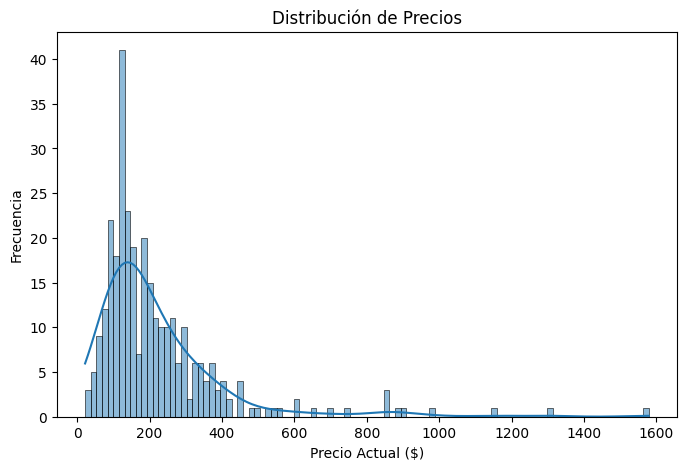

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde CSV
data = pd.read_csv("temp.csv")

# Eliminar filas con valores nulos en columnas clave
data = data.dropna()

# Convertir tipos de datos
data["Ano del modelo"] = data["Ano del modelo"].astype(int)
data["Capacidad de almacenamiento digital"] = data["Capacidad de almacenamiento digital"].astype(float)
data["Memoria RAM"] = data["Memoria RAM"].astype(float)
data["Potencia nominal de la bateria"] = data["Potencia nominal de la bateria"].astype(float)
data["precio_actual"] = data["precio_actual"].astype(float)

# 1. Histograma de precios
plt.figure(figsize=(8,5))
sns.histplot(data["precio_actual"], bins=100, kde=True)
plt.title("Distribución de Precios")
plt.xlabel("Precio Actual ($)")
plt.ylabel("Frecuencia")
plt.show()


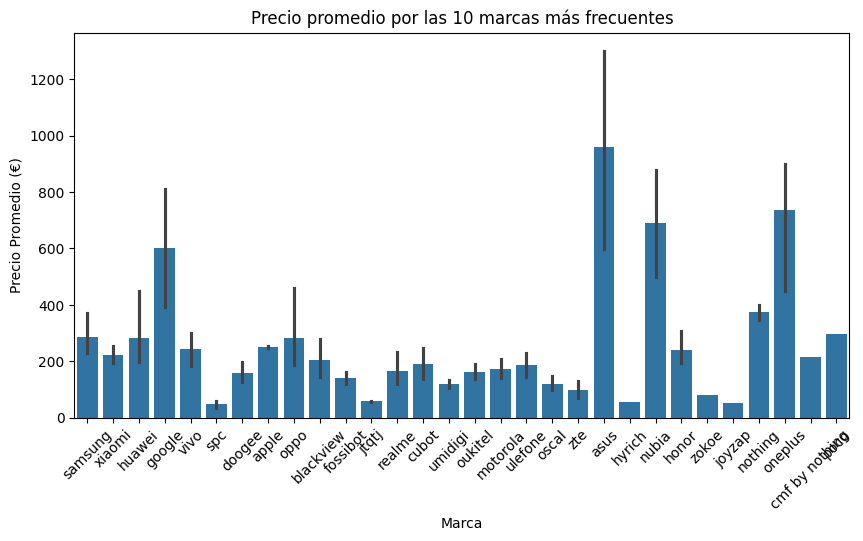

In [36]:

# 2. Precio promedio por marca (top 10 marcas más frecuentes)
top_marcas = data["Marca"].value_counts().index[:30]
data_top_marcas = data[data["Marca"].isin(top_marcas)]
plt.figure(figsize=(10,5))
sns.barplot(x=data_top_marcas["Marca"], y=data_top_marcas["precio_actual"], estimator=lambda x: x.mean())
plt.xticks(rotation=45)
plt.title("Precio promedio por las 10 marcas más frecuentes")
plt.xlabel("Marca")
plt.ylabel("Precio Promedio (€)")
plt.show()



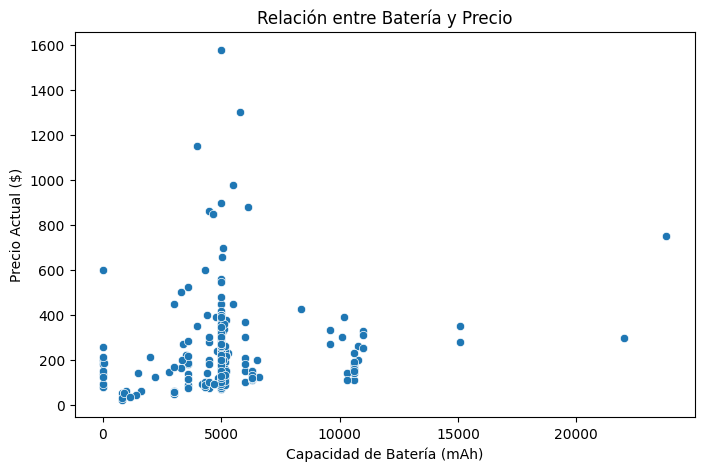

In [30]:
# 3. Relación entre batería y precio
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Potencia nominal de la bateria"], y=data["precio_actual"])
plt.title("Relación entre Batería y Precio")
plt.xlabel("Capacidad de Batería (mAh)")
plt.ylabel("Precio Actual ($)")
plt.show()

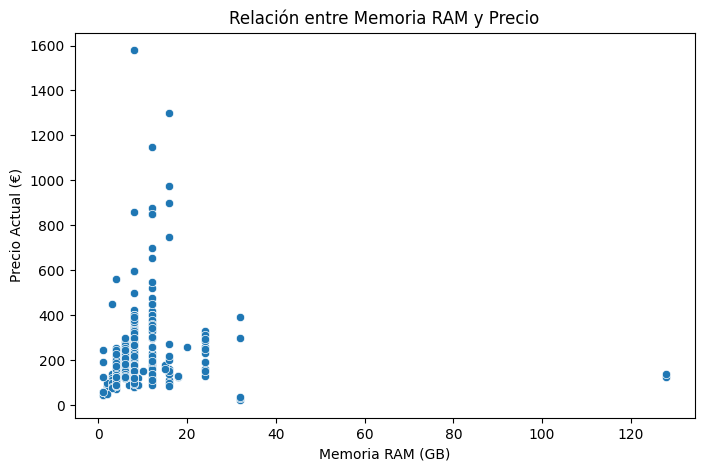

In [31]:
# 4. Relación entre memoria RAM y precio
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Memoria RAM"], y=data["precio_actual"])
plt.title("Relación entre Memoria RAM y Precio")
plt.xlabel("Memoria RAM (GB)")
plt.ylabel("Precio Actual (€)")
plt.show()

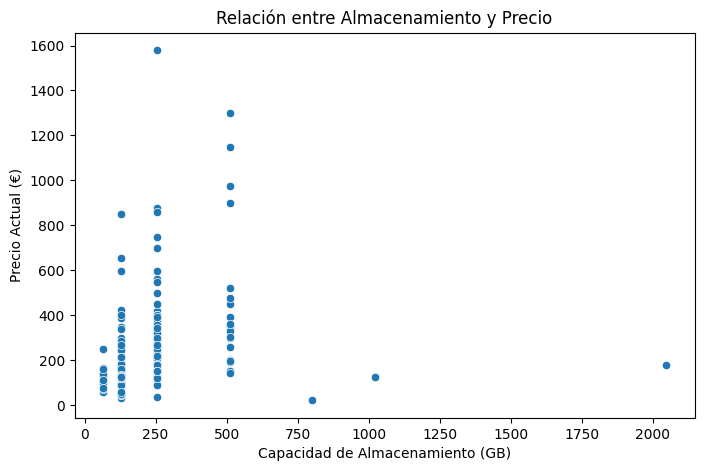

In [32]:
# 5. Relación entre almacenamiento digital y precio
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Capacidad de almacenamiento digital"], y=data["precio_actual"])
plt.title("Relación entre Almacenamiento y Precio")
plt.xlabel("Capacidad de Almacenamiento (GB)")
plt.ylabel("Precio Actual (€)")
plt.show()

In [40]:
# 6. Estadísticas importantes
marca_mas_cara = data.groupby("Marca")["precio_actual"].mean().idxmax()
marca_mas_barata = data.groupby("Marca")["precio_actual"].mean().idxmin()
media_precio = data["precio_actual"].mean()
max_precio = data["precio_actual"].max()
min_precio = data["precio_actual"].min()
ram_max = data["Memoria RAM"].max()
marca_num = data["Marca"].count()

ram_min = data["Memoria RAM"].min()
bat_max = data["Potencia nominal de la bateria"].max()
bat_min = data["Potencia nominal de la bateria"].min()
ano_max = data["Ano del modelo"].max()
ano_min = data["Ano del modelo"].min()
print("--------MARCAS-------------\n")
print(f"Marcas totales: {marca_num}")
print(f"Marca con la media más cara: {marca_mas_cara}")
print(f"Marca con la media más barata: {marca_mas_barata}")
print("\n--------PRECIOS------------\n")
print(f"Precio medio de todos los dispositivos: {media_precio:.2f}€")
print(f"Precio máximo registrado: {max_precio:.2f}€")
print(f"Precio mínimo registrado: {min_precio:.2f}€")
print("\n--------RAM----------------\n")
print(f"Memoria RAM maxima: {ram_max:.2f}")
print(f"Memoria RAM minima: {ram_min:.2f}")
print("\n--------BATERIA------------\n")
print(f"Bateria maxima: {bat_max:.2f} mAh")
print(f"Bateria minima: {bat_min:.2f} mAh")

print("\n--------FECHA--------------\n")
print(f"Año mas alto: {ano_max:.2f}")
print(f"Año mas bajo: {ano_min:.2f}")

--------MARCAS-------------

Marcas totales: 308
Marca con la media más cara: asus
Marca con la media más barata: ttfone

--------PRECIOS------------

Precio medio de todos los dispositivos: 222.09€
Precio máximo registrado: 1579.00€
Precio mínimo registrado: 21.99€

--------RAM----------------

Memoria RAM maxima: 128.00
Memoria RAM minima: 1.00

--------BATERIA------------

Bateria maxima: 23800.00 mAh
Bateria minima: 1.00 mAh

--------FECHA--------------

Año mas alto: 2025.00
Año mas bajo: 2013.00


In [34]:

def analisis_moviles(df):
    """
    Realiza análisis sobre un DataFrame de móviles y guarda los resultados en un archivo de texto.

    Args:
        df: DataFrame de pandas con datos de móviles.
        nombre_archivo: Nombre del archivo de texto para guardar los resultados.
    """

    resultados = {}

    # Media de precio por marca
    resultados['media_precio_por_marca'] = df.groupby('Marca')['precio_actual'].mean().to_dict()

    # Marca con mayor bajada de precio
    df['variacion_precio'] = df['precio_anterior'] - df['precio_actual']
    marca_mayor_bajada = df.loc[df['variacion_precio'].idxmax(), 'Marca']
    resultados['marca_mayor_bajada'] = marca_mayor_bajada

    # Año con precio más bajo
    año_precio_mas_bajo = df.loc[df['precio_actual'].idxmin(), 'Ano del modelo']
    resultados['año_precio_mas_bajo'] = año_precio_mas_bajo

    # Precio más alto
    precio_mas_alto = df['precio_actual'].max()
    resultados['precio_mas_alto'] = precio_mas_alto

    # Precio más bajo
    precio_mas_bajo = df['precio_actual'].min()
    resultados['precio_mas_bajo'] = precio_mas_bajo

    # Media de precio general
    media_precio_general = df['precio_actual'].mean()
    resultados['media_precio_general'] = media_precio_general

    # Guardar resultados en archivo de texto
    with open('resultados_moviles.txt', 'w') as f:
        for clave, valor in resultados.items():
            f.write(f"{clave}: {valor}\n")

    return resultados

# Ejemplo de uso con tu CSV (asumiendo que está en un archivo llamado 'moviles.csv')
df = pd.read_csv('data.csv')
resultados = analisis_moviles(df)
print("Resultados guardados en 'resultados_moviles.txt'")

Resultados guardados en 'resultados_moviles.txt'
